In [1]:
%matplotlib inline

import torch
import numpy as np
import rbm_demo_utils
import rbm_models

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = rbm_demo_utils.MNIST(max_len=2000)

5


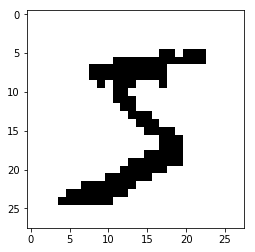

In [3]:
rbm_demo_utils.display_image(mnist[0][0])

In [4]:
net = rbm_models.HopfieldNet(mnist[0][0].size()[0])

In [5]:
trainer = rbm_models.HopfieldTrainWrapper(net, 1)

In [6]:
rbm_demo_utils.train([trainer], mnist, rbm_demo_utils.IdentityLoss(), 300, 500, 0.001, 'hopfield')

Loaded checkpoint directly


In [7]:
example = torch.autograd.Variable(mnist[np.random.randint(2000, 60000)][0].unsqueeze(dim=0))
example[0, -10:] = -1
if net.weights.data.is_cuda:
    example = example.cuda()
example_ev = net(example, num_iters=1000)

0


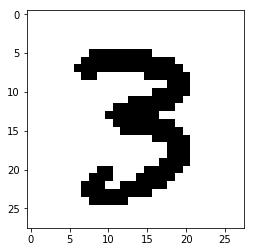

In [8]:
rbm_demo_utils.display_image(example.data[0])

3


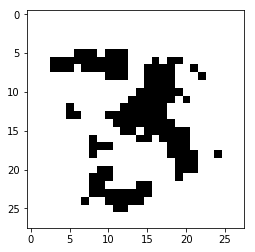

In [9]:
rbm_demo_utils.display_image(example_ev.data[0])